# Predict survival on the Titanic
In this Lab, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy

### Dataset
The dataset contains 891 observations of 12 variables:
* **PassengerId**: Unique ID for each passenger
* **Survived**: Survival (0 = No; 1 = Yes)
* **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **Name**: Name
* **Sex**: Sex
* **Age**: Age
* **Sibsp**: Number of Siblings/Spouses Aboard
* **Parch**: Number of Parents/Children Aboard
* **Ticket**: Ticket Number
* **Fare**: Passenger Fare
* **Cabin**: Cabin
* **Embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
# your code here
import pandas as pd 
import numpy as np

In [2]:
titanic = pd.read_csv('titanic.csv')  # your code here
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# print some info about the dataframe
# your code here
print(titanic.shape)
print(titanic.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Looks like there are some Nan values, let's see how many for each column

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin** contains a lot of Nan values, we'll drop this column <br>
We'll replace the Nan values in **Age** with the age's median, and the ones in **Embarked** with **'S'**, which is the most frequent one in this column

In [7]:
# your code here to drop Cabin
titanic.drop('Cabin', axis = 1, inplace = True)

# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
titanic["Age"].fillna(titanic["Age"].median, inplace = True)
titanic["Embarked"].fillna(titanic["Embarked"].mode, inplace = True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Visualization

survival rate = 0.3838383838383838


<AxesSubplot:title={'center':"Label's Balance"}, xlabel='Survived'>

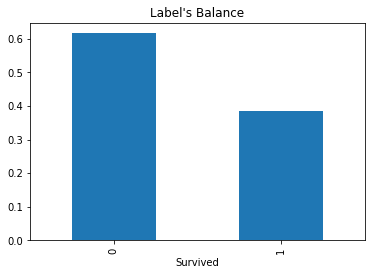

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('survival rate =', titanic.Survived.mean())
(titanic.groupby('Survived').size()/titanic.shape[0]).plot(kind="bar",title="Label's Balance")


In [9]:
# make a function to plot survival against passenger attribute
def survival_rate(column,t):
    df=pd.DataFrame()
    df['total']=titanic.groupby(column).size()
    df['survived'] = titanic.groupby(column).sum()['Survived']
    df['percentage'] = round(df['survived']/df['total']*100,2)
    print(df)

    df['survived'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="Survivors per "+str(column))
    plt.show()

        total  survived  percentage
Sex                                
female    314       233       74.20
male      577       109       18.89


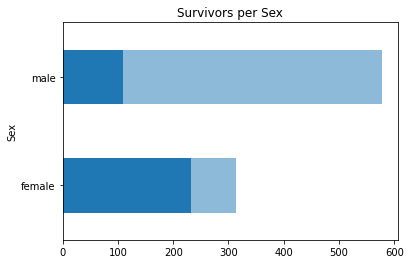

In [10]:
# Draw survival per Sex
survival_rate("Sex","barh")

        total  survived  percentage
Pclass                             
1         216       136       62.96
2         184        87       47.28
3         491       119       24.24


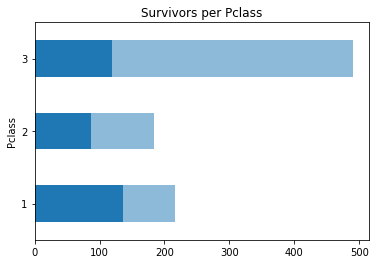

In [11]:
# Draw survival per Class
survival_rate("Pclass","barh")

                                                    total  survived  \
Embarked                                                              
<bound method Series.mode of 0      S\n1      C...      2         2   
C                                                     168        93   
Q                                                      77        30   
S                                                     644       217   

                                                    percentage  
Embarked                                                        
<bound method Series.mode of 0      S\n1      C...      100.00  
C                                                        55.36  
Q                                                        38.96  
S                                                        33.70  


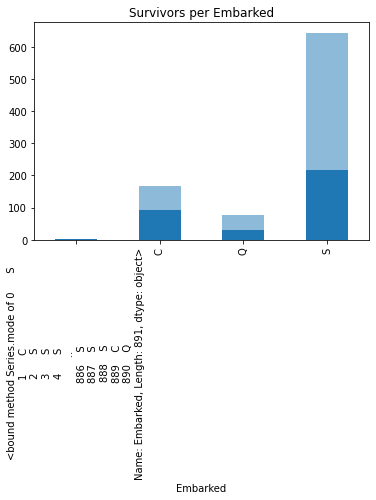

In [12]:
# Graph survived per port of embarkation
survival_rate("Embarked","bar")

       total  survived  percentage
Parch                             
0        678       233       34.37
1        118        65       55.08
2         80        40       50.00
3          5         3       60.00
4          4         0        0.00
5          5         1       20.00
6          1         0        0.00


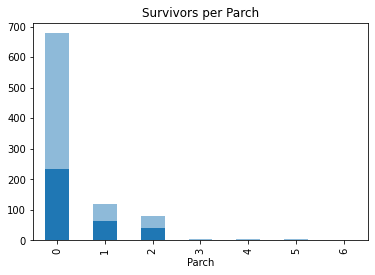

In [13]:
# Draw survived per Number of Parents/Children Aboard (Parch)
# your code here
survival_rate('Parch',"bar")

       total  survived  percentage
SibSp                             
0        608       210       34.54
1        209       112       53.59
2         28        13       46.43
3         16         4       25.00
4         18         3       16.67
5          5         0        0.00
8          7         0        0.00


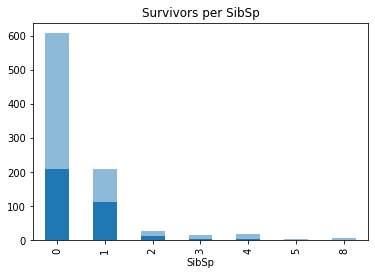

In [14]:
# Draw survived per Number of Siblings/Spouses Aboard (SibSp)
# your code here
survival_rate('SibSp', "bar")

## Model training

Some of the columns don't have predictive power, so let's specify which ones are included for prediction

In [15]:
predictors = ["Pclass", "Sex", "Age", 'SibSp' ,'Parch', "Fare", "Embarked"]  

We need now to convert text columns in **predictors** to numerical ones

In [16]:
for col in predictors: # Loop through all columns in predictors
    if titanic[col].dtype == 'object':  # check if column's type is object (text)
        titanic[col] = pd.Categorical(titanic[col]).codes  # convert text to numerical

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,3
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,3


In [17]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
# your code here
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(titanic[predictors], titanic['Survived'], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (623, 7) (623,)
test shape (268, 7) (268,)


In [18]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# your code here
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)
# your code here
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.8138041733547352
test accuracy = 0.7611940298507462


Let's print the model's parameters

In [19]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

     Feature  Coefficient Estimate
0     Pclass             -0.891619
1        Sex             -2.679929
2        Age              0.001337
3      SibSp             -0.237991
4      Parch              0.086617
5       Fare              0.000066
6   Embarked             -0.230639
7  Intercept              3.698563


We now need to predict class labels for the test set. We will also generate the class probabilities

In [25]:
# predict class labels for the test set
y_pred = clf.predict(X_test)
print (y_pred)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 0 0 0 0]


In [26]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
y_probs = clf.predict_proba(X_test)
print (y_probs)

[[0.09811678 0.90188322]
 [0.91231803 0.08768197]
 [0.21933444 0.78066556]
 [0.36162655 0.63837345]
 [0.19261216 0.80738784]
 [0.91026515 0.08973485]
 [0.77042761 0.22957239]
 [0.13186827 0.86813173]
 [0.57773539 0.42226461]
 [0.41804473 0.58195527]
 [0.90872448 0.09127552]
 [0.41702822 0.58297178]
 [0.63524995 0.36475005]
 [0.81004738 0.18995262]
 [0.36163243 0.63836757]
 [0.6319125  0.3680875 ]
 [0.94210346 0.05789654]
 [0.92614495 0.07385505]
 [0.90591444 0.09408556]
 [0.25642063 0.74357937]
 [0.90894583 0.09105417]
 [0.89294928 0.10705072]
 [0.06687551 0.93312449]
 [0.80527616 0.19472384]
 [0.34973759 0.65026241]
 [0.91199266 0.08800734]
 [0.08935272 0.91064728]
 [0.22206506 0.77793494]
 [0.81048368 0.18951632]
 [0.10669091 0.89330909]
 [0.41763687 0.58236313]
 [0.63588507 0.36411493]
 [0.36702898 0.63297102]
 [0.46411658 0.53588342]
 [0.88515013 0.11484987]
 [0.59951235 0.40048765]
 [0.61781714 0.38218286]
 [0.9123211  0.0876789 ]
 [0.57163057 0.42836943]
 [0.91156683 0.08843317]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 (Survived) any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [27]:
pred = pd.DataFrame({        
        "Survived_original": y_test,
        "Survived_predicted": y_pred,
        "Survived_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Survived_original ==pred.Survived_predicted
pred.head()

,Survived_original,Survived_predicted,Survived_proba,Comparison
862,1,1,0.901883,True
223,0,0,0.087682,True
84,1,1,0.780666,True
680,0,1,0.638373,False
535,1,1,0.807388,True


## Confusion matrix

In [28]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[132  21]
 [ 43  72]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       153
           1       0.77      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [31]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# your code here
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, titanic[predictors], titanic["Survived"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.77653631 0.79775281 0.78089888 0.7752809  0.80337079]
0.7867679367271357


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.